IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [33]:
import asyncio
import nest_asyncio
import aiohttp
from understat import Understat
import requests
import codecs
from bs4 import BeautifulSoup as soup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [34]:
club="Freiburg"

In [35]:
with open('club_name.txt', 'w') as f:
    f.write(club)
    f.close

In [36]:
team_for_foto=""
if club == "RasenBallsport Leipzig":
    team_for_foto="RB Leipzig"
else:
    team_for_foto=club
team_for_foto

'Freiburg'

In [37]:
torneo="2025-2026"

In [38]:
%run -i undesstatteams.py

Freiburg
[
    {
        "id": "30229",
        "isResult": true,
        "side": "h",
        "h": {
            "id": "135",
            "title": "Freiburg",
            "short_title": "FRE"
        },
        "a": {
            "id": "121",
            "title": "Augsburg",
            "short_title": "AUG"
        },
        "goals": {
            "h": "1",
            "a": "3"
        },
        "xG": {
            "h": "2.27247",
            "a": "1.30191"
        },
        "datetime": "2025-08-23 13:30:00",
        "forecast": {
            "w": 0.5925168464225276,
            "d": 0.19668594002651046,
            "l": 0.21079719312616949
        },
        "result": "l"
    },
    {
        "id": "30241",
        "isResult": true,
        "side": "a",
        "h": {
            "id": "134",
            "title": "FC Cologne",
            "short_title": "COL"
        },
        "a": {
            "id": "135",
            "title": "Freiburg",
            "short_title": "FRE"
      

In [39]:
#Get csv from D://understatteams.py
df_understat=pd.read_csv(f'{club}_seasons_shots.csv')

In [40]:
df_understat.head()

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,74,0.017,0.482,Karim Coulibaly,LeftFoot,OwnGoal,Werder Bremen,Freiburg,NaN,0.000000
1,14,0.795,0.582,Maximilian Eggestein,LeftFoot,BlockedShot,Freiburg,Augsburg,Vincenzo Grifo,0.040833
2,15,0.949,0.589,Philipp Lienhart,Head,MissedShots,Freiburg,Augsburg,Vincenzo Grifo,0.028368
3,21,0.913,0.629,Yuito Suzuki,LeftFoot,MissedShots,Freiburg,Augsburg,NaN,0.075692
4,23,0.859,0.456,Vincenzo Grifo,RightFoot,BlockedShot,Freiburg,Augsburg,NaN,0.074379


In [41]:
own_goals_total=len(df_understat[df_understat['result']=='OwnGoal'])
own_goals_total

1

In [42]:
own_goals=df_understat[df_understat['result']=='OwnGoal']
own_goals['xG']=0.5
own_goals

C:\Users\enado\AppData\Local\Temp\ipykernel_5484\1559663483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  own_goals['xG']=0.5


,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,74,0.017,0.482,Karim Coulibaly,LeftFoot,OwnGoal,Werder Bremen,Freiburg,NaN,0.5


In [43]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "bundesliga",
            2025,
            team_title=club
        )
        squad=json.dumps(players, indent=4, ensure_ascii=False)
    with codecs.open(f'{club}_squad.json', "w", "utf-8") as jsonfile:
        jsonfile.write(squad)
        #json.dumps(jamal_json, indent=4)
        jsonfile.close() 

nest_asyncio.apply()
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

squad_df=pd.read_json(f'{club}_squad.json')

In [44]:
squad=squad_df['player_name'].unique()
squad

array(['Vincenzo Grifo', 'Derry Scherhant', 'Igor Matanovic',
       'Maximilian Eggestein', 'Lukas Kübler', 'Junior Adamu',
       'Matthias Ginter', 'Philipp Lienhart', 'Christian Günter',
       'Nicolas Höfler', 'Anthony Jung', 'Lucas Höler',
       'Eren Sami Dinkci', 'Patrick Osterhage', 'Noah Atubolu',
       'Merlin Röhl', 'Yuito Suzuki', 'Jan-Niklas Beste', 'Jordy Makengo',
       'Max Rosenfelder', 'Philipp Treu', 'Johan Manzambi',
       'Cyriaque Irié'], dtype=object)

In [45]:
"Paul Nebel" in squad

False

In [46]:
own_goals_len=len(own_goals[~own_goals['player'].isin(squad)])
own_goals_len

1

In [47]:
ogf=own_goals[~own_goals['player'].isin(squad)]
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,74,0.017,0.482,Karim Coulibaly,LeftFoot,OwnGoal,Werder Bremen,Freiburg,NaN,0.5


In [48]:
own_goals_for=0
for player in own_goals['player']:
    if player not in squad:
        own_goals_for+=1
own_goals_for

1

In [49]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

#df_understat['result'].unique()

In [50]:
#df_understat[df_understat['result']=='OwnGoal']

In [51]:
#pip install mplsoccer
#pip install highlight-text

In [52]:
from highlight_text import ax_text,fig_text
from mplsoccer import (VerticalPitch, Pitch)

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [53]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Bahnschrift'
mpl.rcParams['legend.fontsize'] = 12


In [54]:
#mpl.font_manager.FontManager.get_font_names(mpl)

In [55]:
import numpy as np

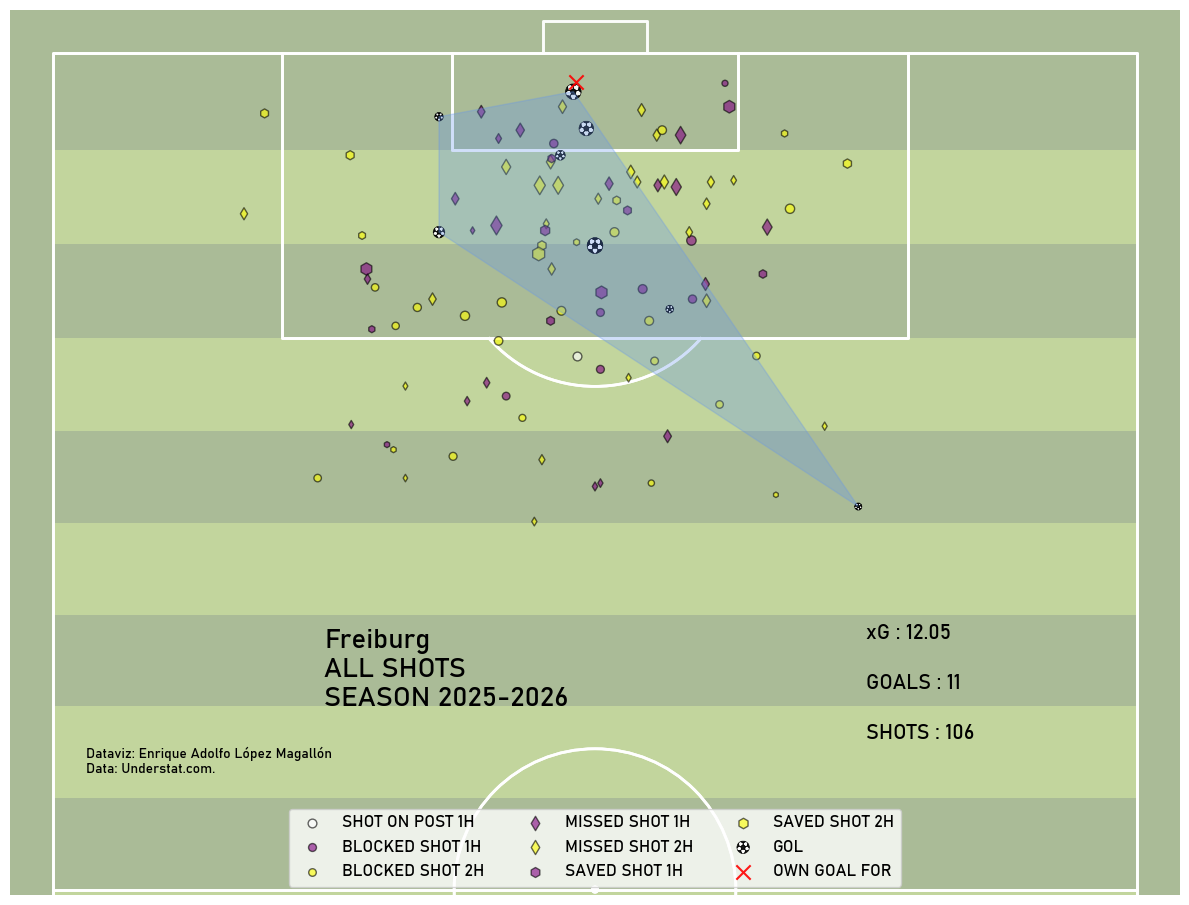

In [56]:
# SETTING UP THE AXES
#fig, ax = plt.subplots(figsize=(10,12))
#ax.axis('off')
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST TEAM
pitch = pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  

fig, ax = pitch.draw(figsize=(12, 10))

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_understat
#df_hOG = df_fil[df_fil['HomeAway']=='a']
#df_fil = df_a
#df_hOG = df_fil[df_fil['HomeAway']=='h']
df_h1H = df_fil[df_fil['minute']<=45]
df_h2H = df_fil[df_fil['minute']>45]

#PLOTTING SHOTS TEAM 1 PER TYPE AND HALF.LABELS APPEAR ONLY IF VARIABLE IS FILLED


if "ShotOnPost" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='ShotOnPost']['X'],df_h1H[df_h1H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 1H")

if "ShotOnPost" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='ShotOnPost']['X'],df_h2H[df_h2H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 2H")
    
if "BlockedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='BlockedShot']['X'],df_h1H[df_h1H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="BLOCKED SHOT 1H")

if "BlockedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='BlockedShot']['X'],df_h2H[df_h2H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="BLOCKED SHOT 2H")

if "MissedShots" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='MissedShots']['X'],df_h1H[df_h1H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="MISSED SHOT 1H")

if "MissedShots" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='MissedShots']['X'],df_h2H[df_h2H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="MISSED SHOT 2H")
    
if "SavedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='SavedShot']['X'],df_h1H[df_h1H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="SAVED SHOT 1H")

if "SavedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='SavedShot']['X'],df_h2H[df_h2H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="SAVED SHOT 2H")
    


#NOW PLOTTING THE GOALS
if "Goal" in iter(df_fil['result']):
    pitch.scatter(df_fil[df_fil['result']=='Goal']['X'],df_fil[df_fil['result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xG'])*150, marker='football', alpha=0.9,
              edgecolors='black', facecolor='red', ax=ax, label="GOL")
    hull=pitch.convexhull(df_fil[df_fil['result']=='Goal']['X'], df_fil[df_fil['result']=='Goal']['Y'])
    pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)

if "OwnGoal" in iter(ogf['result']):
    pitch.scatter(100-ogf[ogf['result']=='OwnGoal']['X']*100,100-ogf[df_fil['result']=='OwnGoal']['Y']*100, 
              s=np.sqrt(ogf[ogf['result']=='OwnGoal']['xG'])*150, marker='x', alpha=0.9,
              edgecolors='red', facecolor='red', ax=ax, label="OWN GOAL FOR")
    #hull=pitch.convexhull(df_fil[df_fil['result']=='OwnGoal']['X'], df_fil[df_fil['result']=='OwnGoal']['Y'])
    #pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
#OWNGOALS
#if len(df_hOG) >0:
 #   pitch.scatter(df_hOG[df_hOG['result']=='Goal']['X'],df_hOG[df_hOG['result']=='Goal']['Y'], 
  #            s=np.sqrt(df_hOG[df_hOG['result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
   #           edgecolors='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax.legend(loc='lower center', ncol=3)#.get_texts()[0].set_color("black")

ax.text(25,62,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
#ax.text(25,62,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])), weight='bold', size=15)
ax.text(25,65,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax.text(25,59,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)



pitch.draw(ax=ax)

# ADDING A FOOTER
ax.text(97,57,'Dataviz: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')

#EXPORT TO IMG

plt.savefig(f'{club}_shots.png',dpi=300,facecolor=background)

In [57]:
df_fil[df_fil['result']=='Goal']

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
11,57,88.500000,50.000000,Vincenzo Grifo,RightFoot,Goal,Freiburg,Augsburg,NaN,0.757696
26,83,93.900002,53.200001,Maximilian Eggestein,Head,Goal,FC Cologne,Freiburg,Christian Günter,0.123709
39,80,84.699997,43.099998,Igor Matanovic,LeftFoot,Goal,Freiburg,VfB Stuttgart,Lukas Kübler,0.049011
41,85,96.199997,64.400002,Derry Scherhant,RightFoot,Goal,Freiburg,VfB Stuttgart,NaN,0.069900
42,91,88.500000,50.000000,Igor Matanovic,RightFoot,Goal,Freiburg,VfB Stuttgart,NaN,0.757777
43,32,88.500000,50.000000,Vincenzo Grifo,RightFoot,Goal,Werder Bremen,Freiburg,NaN,0.757777
47,53,95.500000,50.799999,Junior Adamu,LeftFoot,Goal,Werder Bremen,Freiburg,Vincenzo Grifo,0.595750
54,2,97.699997,52.000000,Lukas Kübler,RightFoot,Goal,Freiburg,Hoffenheim,Junior Adamu,0.777531
71,1,89.300003,64.400002,Derry Scherhant,LeftFoot,Goal,Freiburg,Eintracht Frankfurt,Johan Manzambi,0.233771
80,86,72.900002,25.700001,Vincenzo Grifo,RightFoot,Goal,Freiburg,Eintracht Frankfurt,NaN,0.034243
